In [21]:
import pandas as pd
import numpy as np
import io
import glob
import os
print(os.listdir("../Capstone"))

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


['.DS_Store', 'Cap.ipynb', 'modeltest.h5', '.ipynb_checkpoints', 'ft']


In [22]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [23]:
#We have 43 different image folders with 43 different CSV files
#Let's build one complete dataframe here to work with

data = []

path = '../Capstone/ft/Images' #read our path
all_files = glob.glob(path + '/**/*.csv') #read from the csv files in the image folder

for new in all_files:
    dfnew = pd.read_csv(new, sep=';', index_col=None, header=0) #read and organize our csv's
    dfnew['filename'] = os.path.dirname(new) #example: we're adding '../Capstone/ft/Images/00028'
    data.append(dfnew)
    
frame = pd.concat(data, axis=0, ignore_index=True) #concat list into dataframe
frame['name'] = frame['filename'] + '/' + frame['Filename'] #merge file name w/ dirname

df = frame.drop(['Filename', 'filename'], axis=1) #drop what isnt needed here

df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,name
0,38,35,5,5,33,30,31,../Capstone/ft/Images/00031/00000_00000.ppm
1,40,36,6,5,34,31,31,../Capstone/ft/Images/00031/00000_00001.ppm
2,40,37,5,5,34,32,31,../Capstone/ft/Images/00031/00000_00002.ppm
3,41,39,6,6,36,34,31,../Capstone/ft/Images/00031/00000_00003.ppm
4,43,37,6,5,38,32,31,../Capstone/ft/Images/00031/00000_00004.ppm


In [24]:
#How many unique classifiers do we have? Does it match the number of image files?

df.ClassId.nunique()

43

In [25]:
#It looks like we have a bit of a class imbalance

df.ClassId.value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
40     360
20     360
21     330
39     300
24     270
29     270
32     240
42     240
41     240
27     240
37     210
19     210
0      210
Name: ClassId, dtype: int64

In [26]:
namelist = list(df.name)

print(namelist[:10]) #the output we get are the .png files

['../Capstone/ft/Images/00031/00000_00000.ppm', '../Capstone/ft/Images/00031/00000_00001.ppm', '../Capstone/ft/Images/00031/00000_00002.ppm', '../Capstone/ft/Images/00031/00000_00003.ppm', '../Capstone/ft/Images/00031/00000_00004.ppm', '../Capstone/ft/Images/00031/00000_00005.ppm', '../Capstone/ft/Images/00031/00000_00006.ppm', '../Capstone/ft/Images/00031/00000_00007.ppm', '../Capstone/ft/Images/00031/00000_00008.ppm', '../Capstone/ft/Images/00031/00000_00009.ppm']


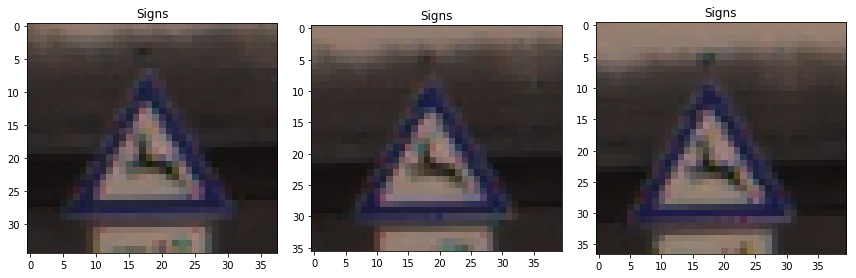

In [27]:
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread(namelist[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('Signs')
    plt.tight_layout()
plt.show()


In [28]:
newdata = []

for image in namelist:
    try:
        img_read = plt.imread(image) #read images
        img_resize = cv2.resize(img_read, (30, 30)) #resize 50x50 all the same shape
        img_array = img_to_array(img_resize) #convert into arrays
        newdata.append(img_array) 
    except:
        print('Exception found')

In [29]:
#Convert to arrays instead of lists

image_data = np.array(newdata)
labels = np.array(list(df.ClassId))

In [30]:
#Order our data and then shuffle it to ensure randomness

idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx] #training (x)
labels = labels[idx] #classifier (y)

In [31]:
#Time to split data into train / test sets
from sklearn.model_selection import train_test_split


x_train, x_test, y_train1, y_test1 = train_test_split(image_data, labels, 
                                                    test_size = 0.20, 
                                                    random_state = 42)


In [32]:
#One-hot encode target column
from keras.utils import to_categorical

y_train = to_categorical(y_train1, 43)
y_test = to_categorical(y_test1, 43)


In [33]:
#Data Shapes

print(x_train.shape) #Image training 
print(x_test.shape) #Image testing

print(y_train.shape) #Label training
print(y_test.shape) #Label Testing

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367, 43)
(7842, 43)


In [34]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [44]:
#Create model
model = Sequential()

#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))


#Flatten connects convulation layer with our dense layer
model.add(Flatten())

model.add(Dense(43, activation='softmax'))

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#padding, pooling
#alexnet arch
#vgg16

In [45]:
m = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size = 100)

Train on 31367 samples, validate on 7842 samples
Epoch 1/3
31367/31367 [==============================] - 62s 2ms/step - loss: 3.2441 - acc: 0.6241 - val_loss: 0.5705 - val_acc: 0.8644
Epoch 2/3
31367/31367 [==============================] - 52s 2ms/step - loss: 0.3576 - acc: 0.9147 - val_loss: 0.3858 - val_acc: 0.9118
Epoch 3/3
31367/31367 [==============================] - 63s 2ms/step - loss: 0.1967 - acc: 0.9507 - val_loss: 0.3337 - val_acc: 0.9272


In [36]:
# model.save('modeltest.h5')

from keras.models import load_model
model = load_model('modeltest.h5')

In [ ]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.figure(figsize = (18,8))

plt.plot(range(3), m.history['acc'], label = 'Training Accuracy')
plt.plot(range(3), m.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [38]:
# Visualizating filters
# https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
from keras import backend as K
K.set_learning_phase(1)
import tensorflow as tf


layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print('Layer dict', layer_dict)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 43)                930219    
Total params: 935,307
Trainable params: 935,307
Non-trainable params: 0
_________________________________________________________________
None


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


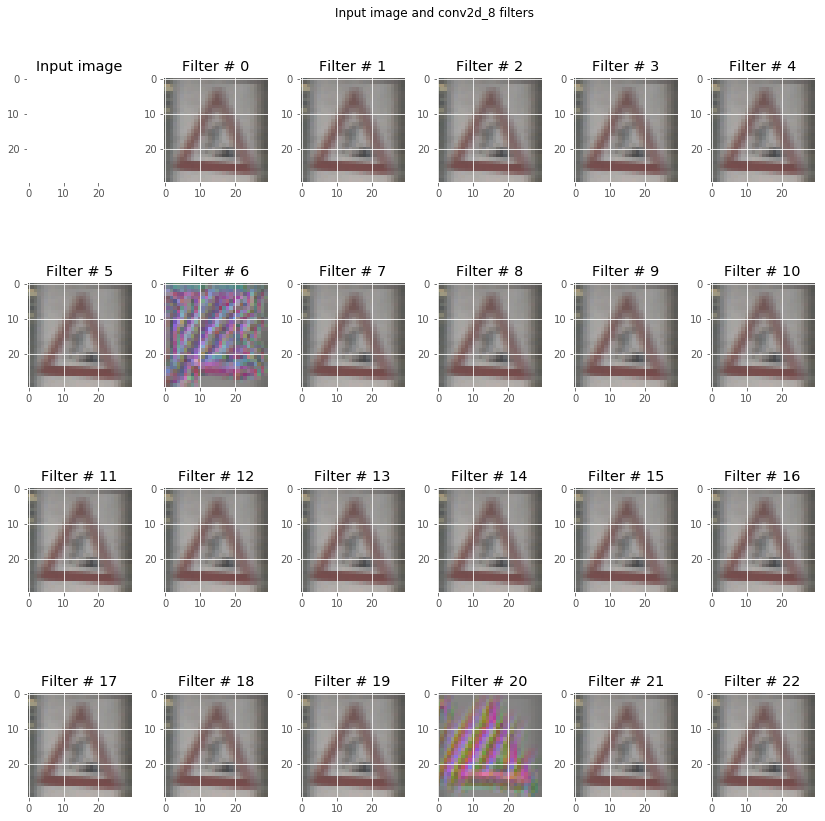

In [41]:
# util function to convert a tensor into a valid image
from keras.layers import Input, Conv2DTranspose

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
#     x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[0]).reshape((1, 30, 30, 3)).astype(np.float64), 
                      layer_name = 'conv2d_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((30, 30, 3)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((30, 30, 3)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.1, rect = [0, 0, 0.95, 0.95])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('Filter # %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [61]:
"""Utilities to compute SaliencyMasks."""
import numpy as np
import keras.backend as K

class SaliencyMask(object):
    """Base class for saliency masks. Alone, this class doesn't do anything."""
    def __init__(self, model, output_index=0):
        """Constructs a SaliencyMask.
        Args:
            model: the keras model used to make prediction
            output_index: the index of the node in the last layer to take derivative on
        """
        pass

    def get_mask(self, input_image):
        """Returns an unsmoothed mask.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        pass

    def get_smoothed_mask(self, input_image, stdev_spread=.2, nsamples=50):
        """Returns a mask that is smoothed with the SmoothGrad method.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        stdev = stdev_spread * (np.max(input_image) - np.min(input_image))

        total_gradients = np.zeros_like(input_image)
        for i in range(nsamples):
            noise = np.random.normal(0, stdev, input_image.shape)
            x_value_plus_noise = input_image + noise

            total_gradients += self.get_mask(x_value_plus_noise)

        return total_gradients / nsamples

class GradientSaliency(SaliencyMask):
    r"""A SaliencyMask class that computes saliency masks with a gradient."""

    def __init__(self, model, output_index=0):
        # Define the function to compute the gradient
        input_tensors = [model.input,        # placeholder for input image tensor
                         K.learning_phase(), # placeholder for mode (train or test) tense
                        ]
        gradients = model.optimizer.get_gradients(model.output[0][output_index], model.input)
        self.compute_gradients = K.function(inputs=input_tensors, outputs=gradients)

    def get_mask(self, input_image):
        """Returns a vanilla gradient mask.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        
        # Execute the function to compute the gradient
        x_value = np.expand_dims(input_image, axis=0)
        gradients = self.compute_gradients([x_value])[0][0]

        return gradients

In [316]:
"""Utilites to computed GuidedBackprop SaliencyMasks"""

# from saliency import SaliencyMask
import numpy as np
import tensorflow as tf
import keras.backend as K
from keras.models import load_model

class GuidedBackprop(SaliencyMask):
    """A SaliencyMask class that computes saliency masks with GuidedBackProp.
    This implementation copies the TensorFlow graph to a new graph with the ReLU
    gradient overwritten as in the paper:
    https://arxiv.org/abs/1412.6806
    """

    GuidedReluRegistered = False

    def __init__(self, model, output_index=0, custom_loss=None):
        """Constructs a GuidedBackprop SaliencyMask."""

        if GuidedBackprop.GuidedReluRegistered is False:
            @tf.RegisterGradient("GuidedRelu")
            def _GuidedReluGrad(op, grad):
                gate_g = tf.cast(grad > 0, "float32")
                gate_y = tf.cast(op.outputs[0] > 0, "float32")
                return gate_y * gate_g * grad
        GuidedBackprop.GuidedReluRegistered = True
        
#         """ 
#             Create a dummy session to set the learning phase to 0 (test mode in keras) without 
#             inteferring with the session in the original keras model. This is a workaround
#             for the problem that tf.gradients returns error with keras models that contains 
#             Dropout or BatchNormalization.
#             Basic Idea: save keras model => create new keras model with learning phase set to 0 => save
#             the tensorflow graph => create new tensorflow graph with ReLU replaced by GuiededReLU.
#         """   
#         model.save('/tmp/gb_keras.h5') 
#         with tf.Graph().as_default(): 
#             with tf.Session().as_default(): 
#                 K.set_learning_phase(0)
#                 load_model('/tmp/gb_keras.h5', custom_objects={"custom_loss":custom_loss})
#                 session = K.get_session()
#                 tf.train.export_meta_graph()
                
#                 saver = tf.train.Saver()
#                 saver.save(session, '/tmp/guided_backprop_ckpt')

#         self.guided_graph = tf.Graph()
#         with self.guided_graph.as_default():
#             self.guided_sess = tf.Session(graph = self.guided_graph)

#             with self.guided_graph.gradient_override_map({'Relu': 'GuidedRelu'}):
#                 saver = tf.train.import_meta_graph('/tmp/guided_backprop_ckpt.meta')
#                 saver.restore(self.guided_sess, '/tmp/guided_backprop_ckpt')

#                 self.imported_y = self.guided_graph.get_tensor_by_name(model.output.name)[0][output_index]
#                 self.imported_x = self.guided_graph.get_tensor_by_name(model.input.name)

#                 self.guided_grads_node = tf.gradients(self.imported_y, self.imported_x)
        
    def get_mask(self, input_image):
        """Returns a GuidedBackprop mask."""
        x_value = np.expand_dims(input_image, axis=0)
        guided_feed_dict = {}
        guided_feed_dict[self.imported_x] = x_value        

        gradients = self.guided_sess.run(self.guided_grads_node, feed_dict = guided_feed_dict)[0][0]

        return gradients

In [312]:
from sklearn import preprocessing

# transform training label to one-hot encoding
lb = preprocessing.LabelBinarizer()
lb.fit(y_train1)
Y_train = lb.transform(y_train1)
Y_train_label = lb.inverse_transform(Y_train)



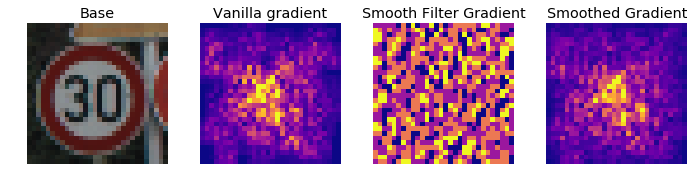

In [431]:

fig, axs = plt.subplots(5,4, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
# axs = axs.ravel()

for i in range (1):
    for j in range(5):
        img = (x_train[j]) + 127.5
        vanilla = GradientSaliency(model, y_train1[j])
#     guided_bprop = GuidedBackprop(model, y_train1[i])
    
        mask = vanilla.get_mask(img)
#     guide_mask = guided_bprop.get_mask(img)
        smooth_mask = vanilla.get_smoothed_mask(img)
        filter_smoothed_mask = (smooth_mask > 0.0).reshape((30, 30, 3))

#   Plot versions
        show_image(img, grayscale = False, ax=plt.subplot(j+1,5,1), title="Base")
        show_image(mask, ax=plt.subplot(j+1,5,2), title='Vanilla gradient')
        show_image(filter_smoothed_mask, ax=plt.subplot(j+1,5,3), title='Smooth Filter Gradient')
        show_image(smooth_mask, ax=plt.subplot(j+1,5,4), title='Smoothed Gradient')



In [ ]:
ypred = model.predict_classes(x_test)

In [166]:
from sklearn.metrics import accuracy_score

accuracy_score(ypred, y_test1)

0.9590665646518746

In [389]:
def show_image(image, grayscale = True, ax=None, title=''):
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    if len(image.shape) == 2 or grayscale == True:
        if len(image.shape) == 3:
            image = np.sum(np.abs(image), axis=2)
            
        vmax = np.percentile(image, 99)
        vmin = np.min(image)

        plt.imshow(image, cmap=plt.cm.plasma, vmin=vmin, vmax=vmax)
        plt.title(title)
    else:
        image = image + 127.5
        image = image.astype('uint8')
        
        plt.imshow(image)
        plt.title(title)
    
def load_image(file_path):
    im = PIL.Image.open(file_path)
    im = np.asarray(im)
    
    return im - 127.5

In [209]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):

    axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    axs[i].set_title(str(250+i))

<function matplotlib.cm.get_cmap(name=None, lut=None)>